### Step 1: Get a list of restaurant

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from pandas.io.json import json_normalize

In [3]:
CLIENT_ID = '???' # deleted
CLIENT_SECRET = '???'  # deleted
VERSION = '20181013'
LIMIT = 50 # this is the max that one can get each time
search_query = 'restaurant'
radius =5000

In [24]:
# list 1 from Marble Hill in NY
latitude = 40.876551
longitude = -73.910660
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
restaurant_list_1 = json_normalize(venues)[['id', 'location.lat', 'location.lng']]
print(restaurant_list_1.shape)
restaurant_list_1.head()

(50, 3)


,id,location.lat,location.lng
0,4e4ddf73bd4101d0d79d3e37,40.878259,-73.903043
1,4baedf9ff964a520c0de3be3,40.873414,-73.889195
2,4c6aebf4599fbe9a3282913f,40.867358,-73.897623
3,4b403740f964a520e8b625e3,40.868588,-73.902104
4,4e4d0392bd413c4cc66dfde5,40.869020,-73.895990


In [25]:
# list 2 from Washington Heights in NY
latitude = 40.851903
longitude = -73.936900
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
restaurant_list_2 = json_normalize(venues)[['id', 'location.lat', 'location.lng']]
print(restaurant_list_2.shape)
restaurant_list_2.head()

(50, 3)


,id,location.lat,location.lng
0,49f23c80f964a520116a1fe3,40.847303,-73.938158
1,4bedb6b1767dc9b6045cd3e9,40.846680,-73.935487
2,4c5a1c706407d13ac80bb428,40.855959,-73.928878
3,4d377465d60c6dcb5d046ebc,40.844216,-73.937567
4,4bdcc53e03be20a1c7b2849b,40.851332,-73.931864


In [26]:
# list 3 from Washington Hamilton Heights in NY
latitude = 40.823604
longitude = -73.949688
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
restaurant_list_3 = json_normalize(venues)[['id', 'location.lat', 'location.lng']]
print(restaurant_list_3.shape)
restaurant_list_3.head()

(50, 3)


,id,location.lat,location.lng
0,4e4e4d33bd4101d0d7a734d4,40.819280,-73.940821
1,4d12b5be80f6721e86dd19eb,40.821571,-73.942878
2,4ad22304f964a5209bdf20e3,40.819390,-73.944440
3,3fd66200f964a52069e81ee3,40.808705,-73.944725
4,4a6a3991f964a520e0cc1fe3,40.810219,-73.943755


In [27]:
# save all datasets into csv files
restaurant_list_1.to_csv('restaurant_list_1.csv')
restaurant_list_2.to_csv('restaurant_list_2.csv')
restaurant_list_3.to_csv('restaurant_list_3.csv')

In [30]:
restaurant_list = restaurant_list_1.append(restaurant_list_2).append(restaurant_list_3)
print(restaurant_list.shape)
restaurant_list.to_csv('restaurant_list.csv')

(150, 3)


### Step 2: Get Rating for the selected restaurant

In [2]:
restaurant_list = pd.read_csv('restaurant_list.csv')
restaurant_list.head()

,Unnamed: 0,id,location.lat,location.lng
0,0,4e4ddf73bd4101d0d79d3e37,40.878259,-73.903043
1,1,4baedf9ff964a520c0de3be3,40.873414,-73.889195
2,2,4c6aebf4599fbe9a3282913f,40.867358,-73.897623
3,3,4b403740f964a520e8b625e3,40.868588,-73.902104
4,4,4e4d0392bd413c4cc66dfde5,40.869020,-73.895990


In [8]:
# create a function to get the rating for each restaurant ID
# then apply this function to a list of IDs
# if the rating is not available, then return 0
def get_rating(id):
    venue_id = id
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        rating = result['response']['venue']['rating']
    except:
        rating = 0
    return rating

In [18]:
ratings = [get_rating(restaurant) for restaurant in restaurant_list['id'].tolist()]
ratings[0:50]

[0,
 7.4,
 7.5,
 7.2,
 0,
 0,
 0,
 0,
 7.7,
 7.2,
 0,
 6.2,
 5.8,
 0,
 0,
 0,
 6.2,
 6.7,
 6.9,
 8.4,
 0,
 6.6,
 0,
 0,
 0,
 7.0,
 0,
 6.9,
 8.1,
 5.2,
 0,
 8.4,
 0,
 0,
 8.2,
 0,
 8.1,
 5.5,
 6.0,
 6.6,
 7.7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Step 3: Get the number of restaurant nearby

In [21]:
# create a function to get the number of restaurants within 500 metres of a given location
# then apply this function to a list of locations.
def get_rivals(location):
    latitude = location[0]
    longitude = location[1]
    radius = 500
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    restaurant_list = json_normalize(venues)[['id', 'location.lat', 'location.lng']]
    return restaurant_list.shape[0]

In [25]:
rivals = [get_rivals(location) for location in restaurant_list[['location.lat', 'location.lng']].values.tolist()]
rivals[0:50]

[24,
 19,
 31,
 24,
 26,
 24,
 22,
 25,
 25,
 19,
 31,
 16,
 33,
 24,
 16,
 31,
 41,
 23,
 14,
 42,
 16,
 39,
 36,
 30,
 17,
 47,
 38,
 49,
 15,
 8,
 19,
 16,
 46,
 39,
 18,
 34,
 24,
 10,
 7,
 25,
 50,
 37,
 43,
 28,
 38,
 16,
 50,
 42,
 25,
 6]

### Step 4: Merge all information into a single dataset

In [32]:
restaurant = restaurant_list[['id', 'location.lat', 'location.lng']].copy()
restaurant['rating'] = ratings
restaurant['rival'] = rivals
restaurant.to_csv('restaurant.csv')
restaurant.head()

,id,location.lat,location.lng,rating,rival
0,4e4ddf73bd4101d0d79d3e37,40.878259,-73.903043,0.0,24
1,4baedf9ff964a520c0de3be3,40.873414,-73.889195,7.4,19
2,4c6aebf4599fbe9a3282913f,40.867358,-73.897623,7.5,31
3,4b403740f964a520e8b625e3,40.868588,-73.902104,7.2,24
4,4e4d0392bd413c4cc66dfde5,40.869020,-73.895990,0.0,26


### Step 5: Explore relationship between competitive pressure and customer rating

In [2]:
import matplotlib.pyplot as plt

In [3]:
restaurant = pd.read_csv('restaurant.csv')

#### 5.1 Check the distribution of the number of rivals.

(array([ 6., 31., 38., 42., 33.]),
 array([ 0, 10, 20, 30, 40, 50]),
 <a list of 5 Patch objects>)

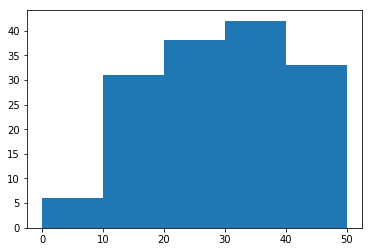

In [4]:
plt.hist(restaurant['rival'], bins = [0, 10, 20, 30, 40, 50])

The histogram above shows that most restaurants are surrouned by 20 - 40 restaurants within 500 meters.

#### 5.2 Check the distribution of ratings.

(array([127.,   0.,   0.,   0.,   0.,   3.,   8.,   7.,   5.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

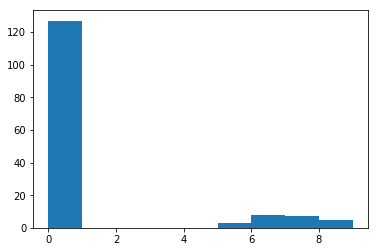

In [5]:
plt.hist(restaurant['rating'], bins = range(0, 10))

Most of the restaurants (127 out of 150) have no rating. The remaining have ratings range from 5 to 8.5.

#### 5.3 For those without rating, check the relationship between probability of no rating and the number of rivals.

[0.66666667 0.74193548 0.86842105 0.92857143 0.84848485]
[ 0. 10. 20. 30. 40. 50.]


Text(0.5,1,'Probability of zero rating')

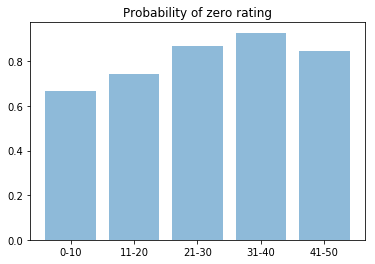

In [6]:
hist_1, edges = np.histogram(
    restaurant['rival'][restaurant['rating'] == 0],
    bins=5,
    range=(0, 50),
    density=False)

hist_2, edges = np.histogram(
    restaurant['rival'],
    bins=5,
    range=(0, 50),
    density=False)

print(hist_1/hist_2)
print(edges)

plt.bar([0,1,2,3,4], hist_1/hist_2, align='center', alpha=0.5)
plt.xticks([0,1,2,3,4], ('0-10', '11-20', '21-30', '31-40', '41-50'))
plt.title('Probability of zero rating')


This histogram shows that when a restaurant are surrounded by more other restaurants, it is more likely to have no rating.

#### 5.4 For those with ratings, find the linear relationship between ratings and the number of rivals.

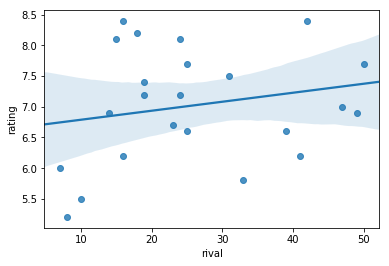

In [10]:
import seaborn as sns
sns.regplot(x="rival", y="rating", data=restaurant.loc[restaurant['rating'] != 0]);

This histogram shows that, conditional on positive ratings, when a restaurant are surrounded by more other restaurants, it is more likely to have higher rating.